# Average Weighted Recommendation Engines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [3]:
movies_merge = movies[['original_title','vote_average' ,'vote_count','popularity']]
movies_merge.head()

,original_title,vote_average,vote_count,popularity
0,Avatar,7.2,11800,150.437577
1,Pirates of the Caribbean: At World's End,6.9,4500,139.082615
2,Spectre,6.3,4466,107.376788
3,The Dark Knight Rises,7.6,9106,112.312950
4,John Carter,6.1,2124,43.926995


In [4]:
movies_merge

,original_title,vote_average,vote_count,popularity
0,Avatar,7.2,11800,150.437577
1,Pirates of the Caribbean: At World's End,6.9,4500,139.082615
2,Spectre,6.3,4466,107.376788
3,The Dark Knight Rises,7.6,9106,112.312950
4,John Carter,6.1,2124,43.926995
...,...,...,...,...
4798,El Mariachi,6.6,238,14.269792
4799,Newlyweds,5.9,5,0.642552
4800,"Signed, Sealed, Delivered",7.0,6,1.444476
4801,Shanghai Calling,5.7,7,0.857008


In [5]:
movies_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  4803 non-null   object 
 1   vote_average    4803 non-null   float64
 2   vote_count      4803 non-null   int64  
 3   popularity      4803 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 150.2+ KB


# Using Weighted average for each movie's Average Rating

In [6]:
v = movies_merge.vote_count
R = movies_merge.vote_average
C = movies_merge.vote_average.mean()
m = movies_merge.vote_count.quantile(0.70)

In [7]:
m

581.0

In [8]:
movies_merge['weighted_avg'] = ((R*v)+(C*m))/(v+m)

<ipython-input-8-521999ec3972>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_merge['weighted_avg'] = ((R*v)+(C*m))/(v+m)


In [9]:
movies_merge.head()

,original_title,vote_average,vote_count,popularity,weighted_avg
0,Avatar,7.2,11800,150.437577,7.148013
1,Pirates of the Caribbean: At World's End,6.9,4500,139.082615,6.807627
2,Spectre,6.3,4466,107.376788,6.276075
3,The Dark Knight Rises,7.6,9106,112.312950,7.509565
4,John Carter,6.1,2124,43.926995,6.098319


In [10]:
movies_ranking = movies_merge.sort_values('weighted_avg',ascending = False)

In [11]:
movies_ranking[['original_title', 'vote_count', 'vote_average', 'weighted_avg', 'popularity']].head(20)

,original_title,vote_count,vote_average,weighted_avg,popularity
1881,The Shawshank Redemption,8205,8.5,8.340775,136.747729
3337,The Godfather,5893,8.4,8.192887,143.659698
662,Fight Club,9413,8.3,8.171648,146.757391
3232,Pulp Fiction,8428,8.3,8.157615,121.463076
65,The Dark Knight,12002,8.2,8.102674,187.322927
809,Forrest Gump,7927,8.2,8.056059,138.133331
1818,Schindler's List,4329,8.3,8.038748,104.469351
3865,Whiplash,4254,8.3,8.034695,192.528841
96,Inception,13752,8.1,8.018611,167.583710
1990,The Empire Strikes Back,5879,8.2,8.010426,78.517830


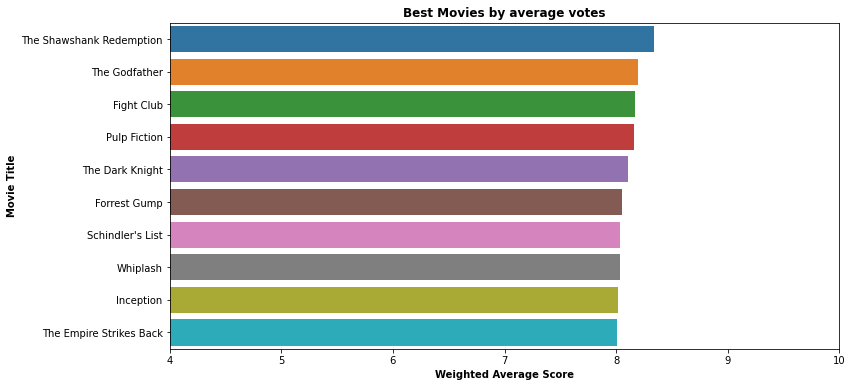

In [12]:
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=movies_ranking['weighted_avg'].head(10), y=movies_ranking['original_title'].head(10), data=movies_ranking)
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies.png')

In [13]:
movies_ranking_pop = movies_merge.sort_values('popularity',ascending = False)
movies_ranking_pop[['original_title', 'vote_count', 'vote_average', 'weighted_avg', 'popularity']].head(20)


,original_title,vote_count,vote_average,weighted_avg,popularity
546,Minions,4571,6.4,6.365286,875.581305
95,Interstellar,10867,8.1,7.998100,724.247784
788,Deadpool,10995,7.4,7.334360,514.569956
94,Guardians of the Galaxy,9742,7.9,7.798252,481.098624
127,Mad Max: Fury Road,9427,7.2,7.135687,434.278564
28,Jurassic World,8662,6.5,6.474365,418.708552
199,Pirates of the Caribbean: The Curse of the Bla...,6985,7.5,7.391892,271.972889
82,Dawn of the Planet of the Apes,4410,7.3,7.159397,243.791743
200,The Hunger Games: Mockingjay - Part 1,5584,6.6,6.552141,206.227151
88,Big Hero 6,6135,7.8,7.652256,203.734590


In [14]:
movies_ranking_pop['popularity'].head(10)

546    875.581305
95     724.247784
788    514.569956
94     481.098624
127    434.278564
28     418.708552
199    271.972889
82     243.791743
200    206.227151
88     203.734590
Name: popularity, dtype: float64

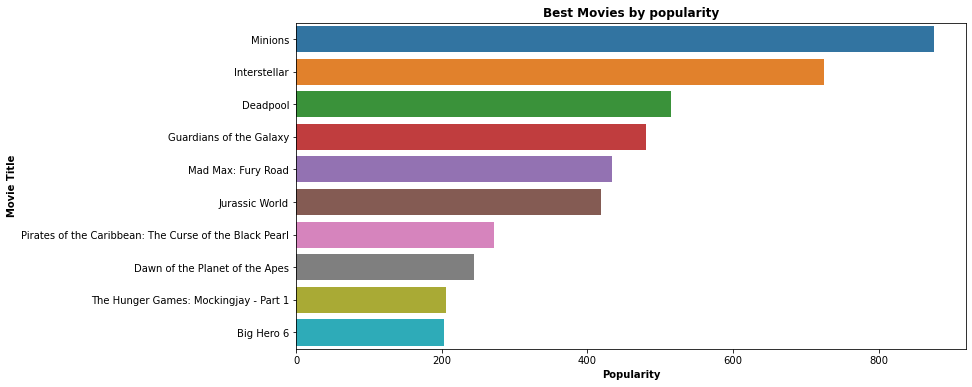

In [15]:
plt.figure(figsize=(12,6))

axis1=sns.barplot(x=movies_ranking_pop['popularity'].head(10), y=movies_ranking_pop['original_title'].head(10), data=movies_ranking_pop)

plt.title('Best Movies by popularity', weight='bold')
plt.xlabel('Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies.png')

# Using Weighted average for each movie's Average Rating and Popularity

In [16]:
from sklearn.preprocessing import MinMaxScaler

movie_scaled = MinMaxScaler().fit_transform(movies_merge[['weighted_avg','popularity']])
movie_normalized=pd.DataFrame(movie_scaled,columns=['weighted_avg','popularity'])
movie_normalized.head()

,weighted_avg,popularity
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635
3,0.773054,0.128272
4,0.387739,0.050169


In [17]:
movies_merge[['normalized_wa','normalized_pop']] = movie_normalized

C:\Users\tom97\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [18]:
movies_merge

,original_title,vote_average,vote_count,popularity,weighted_avg,normalized_wa,normalized_pop
0,Avatar,7.2,11800,150.437577,7.148013,0.674339,0.171815
1,Pirates of the Caribbean: At World's End,6.9,4500,139.082615,6.807627,0.581403,0.158846
2,Spectre,6.3,4466,107.376788,6.276075,0.436273,0.122635
3,The Dark Knight Rises,7.6,9106,112.312950,7.509565,0.773054,0.128272
4,John Carter,6.1,2124,43.926995,6.098319,0.387739,0.050169
...,...,...,...,...,...,...,...
4798,El Mariachi,6.6,238,14.269792,6.239746,0.426353,0.016298
4799,Newlyweds,5.9,5,0.642552,6.090532,0.385613,0.000734
4800,"Signed, Sealed, Delivered",7.0,6,1.444476,6.101451,0.388595,0.001650
4801,Shanghai Calling,5.7,7,0.857008,6.087503,0.384786,0.000979


In [19]:
movies_merge['score'] = movies_merge['normalized_wa'] * 0.5 + movies_merge['normalized_pop'] * 0.5
movies_ranking_new = movies_merge.sort_values(['score'], ascending=False)
movies_ranking_new[['original_title', 'normalized_wa', 'normalized_pop', 'score']].head(20)

<ipython-input-19-96ebcf492397>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_merge['score'] = movies_merge['normalized_wa'] * 0.5 + movies_merge['normalized_pop'] * 0.5


,original_title,normalized_wa,normalized_pop,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668
788,Deadpool,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,0.670973,0.495989,0.583481
1881,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.934991,0.213941,0.574466
3865,Whiplash,0.916431,0.219887,0.568159
3337,The Godfather,0.959622,0.164074,0.561848
662,Fight Club,0.953823,0.167611,0.560717


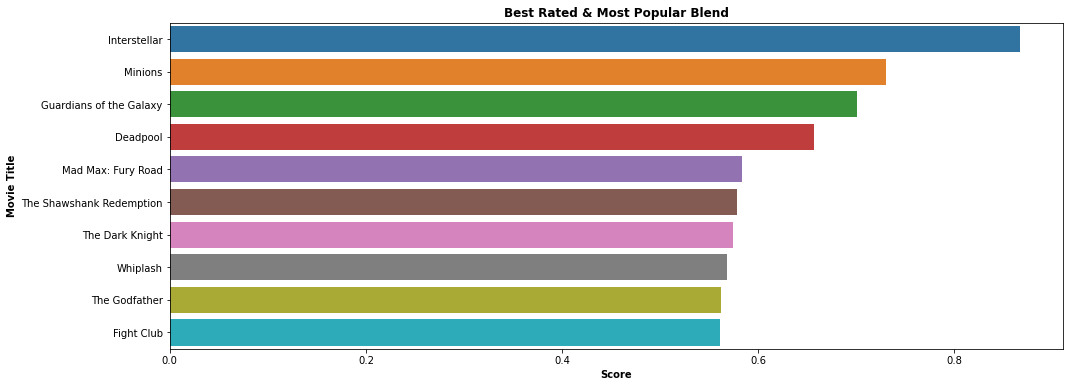

In [20]:
plt.figure(figsize=(16,6))

ax = sns.barplot(x=movies_ranking_new['score'].head(10), y=movies_ranking_new['original_title'].head(10), data=movies_ranking_new)

plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

plt.savefig('scored_movies.png')